In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# HERE WE ARE GOING TO PREDICT THE QUALITY OF MUSHROOM WHETHER IT IS POISONOUS OR NOT

In [55]:
dataset=pd.read_csv("mushrooms.csv")

In [56]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [57]:
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [58]:
dataset1=dataset

In [59]:
dataset.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [60]:
dataset["class"] = [1 if i == "p" else 0 for i in dataset["class"]]

In [61]:
# HERE ABOVE WE HAVE CONVERTED THE POISIONOUS CLASS =1 AND EDIBLE(ACCEPTED CLASS)=0  FOR NUMERIC CALCULATION

In [62]:
dataset['class']

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [63]:
# NOW WE WILL CONVERT ALL OTHER CATEGORY ATTRIBUTES INTO NUMBER

In [64]:
# Dropping "veil-type" column.
dataset.drop("veil-type",axis=1,inplace=True)

In [65]:
"""Now we will change feature column's values to floats.
But how can we do that? I think about one way, maybe there is another good approachs but I didn't search for them. 
Now I will explain how did I manipulate feature datas with one example feature:


All features values should be between 0 and 1. This is the first point.


For example, take "ring_number" column. This column has three unique values which are "n", "o" and "t". 
We can assign 1 and 0 to two of them, and the other one should be between of them. Let's say n = 1, o = 0 and t = 0.5.


Another example is "cap_surface". This column has four unique values, this values don't matter. 
We can assing 1 and 0 to two of them again, but other two variable? Now we will say them 0.33 and 0.67.


From this two example we can derive a mathematical formula.""" 

'Now we will change feature column\'s values to floats.\nBut how can we do that? I think about one way, maybe there is another good approachs but I didn\'t search for them. \nNow I will explain how did I manipulate feature datas with one example feature:\n\n\nAll features values should be between 0 and 1. This is the first point.\n\n\nFor example, take "ring_number" column. This column has three unique values which are "n", "o" and "t". \nWe can assign 1 and 0 to two of them, and the other one should be between of them. Let\'s say n = 1, o = 0 and t = 0.5.\n\n\nAnother example is "cap_surface". This column has four unique values, this values don\'t matter. \nWe can assing 1 and 0 to two of them again, but other two variable? Now we will say them 0.33 and 0.67.\n\n\nFrom this two example we can derive a mathematical formula.'

In [66]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [67]:
(len(dataset['cap-surface'].unique())-1)

3

In [68]:
for column in dataset.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(dataset[column].unique())-1)
    for i in dataset[column].unique():
        dataset[column] = [value if letter == i else letter for letter in dataset[column]]
        value += step

In [69]:
dataset.dtypes

class                         int64
cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [70]:
from sklearn.model_selection import train_test_split
y = dataset["class"].values    # "class" column as numpy array.
x = dataset.drop(["class"], axis=1).values    # All data except "class" column. I didn't use normalization because all data has values between 0 and 1.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)    # Split data for train and test.

In [71]:
#Classification Methods

In [72]:
#logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_pred=lr.predict(x_test)

In [76]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 97.05%


In [77]:
# KNN CLASSIFIER

In [78]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [79]:
# SVM Classification

In [80]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 97.54%


In [82]:
#Naive Bayes Classification

In [83]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.12%


In [84]:
 # Decision Tree Classification

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [86]:
# Random Forest Classification

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [88]:
# Checking Classification Results with Confusion Matrix

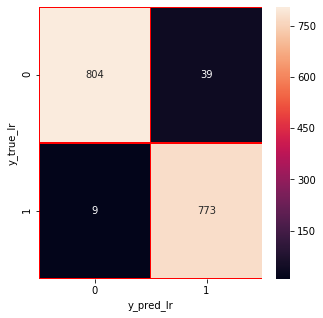

In [89]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

In [90]:
# confusion matrix of random forest

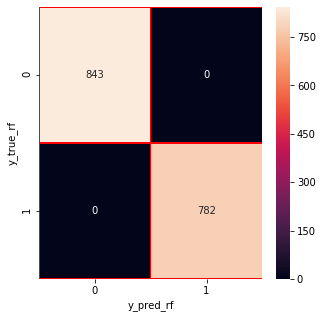

In [91]:
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()